In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import random
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
data = pd.read_csv('/content/SWaT_Dataset_Attack_v0.csv')

In [ ]:
print(data.columns)

Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')


In [ ]:
del data[' Timestamp']
data.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
# Store column names
column_names = data.columns.tolist()

# Check if 'Timestamp' column exists
if ' Timestamp' or 'Normal/Attack' in column_names:
    column_names.remove('Normal/Attack')

column_names

['FIT101',
 'LIT101',
 ' MV101',
 'P101',
 'P102',
 ' AIT201',
 'AIT202',
 'AIT203',
 'FIT201',
 ' MV201',
 ' P201',
 ' P202',
 'P203',
 ' P204',
 'P205',
 'P206',
 'DPIT301',
 'FIT301',
 'LIT301',
 'MV301',
 'MV302',
 ' MV303',
 'MV304',
 'P301',
 'P302',
 'AIT401',
 'AIT402',
 'FIT401',
 'LIT401',
 'P401',
 'P402',
 'P403',
 'P404',
 'UV401',
 'AIT501',
 'AIT502',
 'AIT503',
 'AIT504',
 'FIT501',
 'FIT502',
 'FIT503',
 'FIT504',
 'P501',
 'P502',
 'PIT501',
 'PIT502',
 'PIT503',
 'FIT601',
 'P601',
 'P602',
 'P603']

In [ ]:
data.shape

(449919, 52)

In [ ]:
data.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.0
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,...,0.283806,1.925862,1.0,232.173817,1.013408,174.714484,0.016566,1.0,1.009099,1.0
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,...,0.080924,0.261995,0.0,61.750930,0.412723,47.479809,0.159603,0.0,0.094956,0.0
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,1.000000,1.0,9.468726,0.000000,3.140220,0.000000,1.0,1.000000,1.0
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,...,0.306249,2.000000,1.0,248.029400,0.816967,186.698900,0.000000,1.0,1.000000,1.0
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,...,0.306633,2.000000,1.0,249.295100,0.961138,187.724300,0.000000,1.0,1.000000,1.0
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,...,0.308106,2.000000,1.0,250.881200,1.409669,189.118200,0.000128,1.0,1.000000,1.0
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,0.311693,2.000000,1.0,254.341800,1.970333,191.986000,1.802710,1.0,2.000000,1.0


In [ ]:
data['Normal/Attack'] = data['Normal/Attack'].replace('A ttack', 'Attack')
data['Normal/Attack'].value_counts()

Normal    395298
Attack     54621
Name: Normal/Attack, dtype: int64

In [ ]:
X = data.drop(columns = 'Normal/Attack', axis = 1)
Y = data['Normal/Attack']
X.shape, Y.shape

((449919, 51), (449919,))

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, Y_resampled = undersampler.fit_resample(X, Y)

unique_classes, counts = np.unique(Y_resampled, return_counts=True)
class_distribution = dict(zip(unique_classes, counts))

print("Class Distribution after Random Undersampling:")
for class_label, count in class_distribution.items():
   print(f"{class_label}: {count}")

Class Distribution after Random Undersampling:
Attack: 54621
Normal: 54621


In [14]:
X_resampled.shape, Y_resampled.shape

((109242, 51), (109242,))

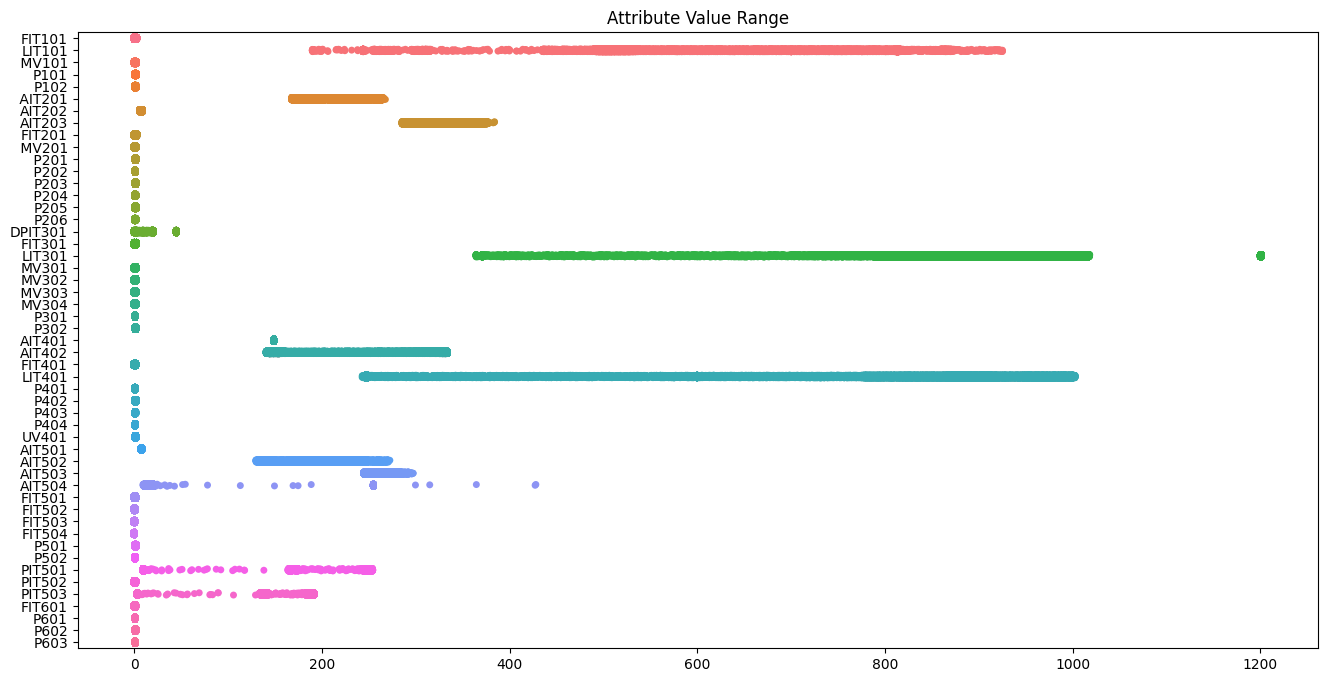

In [15]:
plt.figure(figsize=(16, 8))
sns.stripplot(data=X_resampled, jitter=True, orient="h")
plt.title("Attribute Value Range")
plt.show()

In [16]:
# Normalize the data in X
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled)

# Encode the data in Y
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_resampled)

In [17]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X_resampled.columns)
Y_encoded_df = pd.DataFrame({'Encoded_Target': Y_encoded})

In [18]:
X_normalized_df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.905770,0.853975,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
1,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
2,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
3,0.933457,0.855043,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
4,0.948231,0.855631,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.982596,0.88983,0.984050,0.000071,0.0,0.0,0.0


In [19]:
Y_encoded_df.head()

,Encoded_Target
0,0
1,0
2,0
3,0
4,0


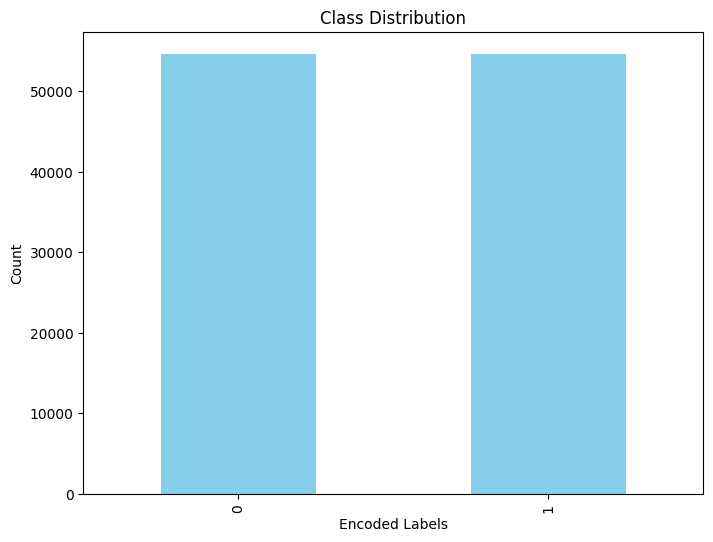

In [20]:
# Assuming Y_encoded_df has only one column
target_counts = Y_encoded_df.iloc[:, 0].value_counts()

plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Encoded Labels')
plt.ylabel('Count')
plt.show()

In [21]:
X_normalized.shape

(109242, 51)

In [22]:
X_normalized_df = pd.DataFrame(X_normalized, columns=column_names)
X_normalized_df.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,...,109242.000000,109242.000000,109242.0,109242.000000,109242.000000,109242.000000,109242.000000,109242.0,109242.000000,109242.0
mean,0.477564,0.638139,0.755337,0.511012,0.027837,0.389035,0.927896,0.427581,0.447393,0.757323,...,0.681191,0.695593,0.0,0.688647,0.410602,0.688961,0.007834,0.0,0.007689,0.0
std,0.461594,0.194181,0.253490,0.499881,0.164507,0.320978,0.051247,0.207657,0.436784,0.252871,...,0.454791,0.460158,0.0,0.443519,0.309511,0.442559,0.081335,0.0,0.087352,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,0.442871,0.500000,0.000000,0.000000,0.132112,0.901405,0.278110,0.000000,0.500000,...,0.000000,0.000000,0.0,0.003206,0.000000,0.004242,0.000000,0.0,0.000000,0.0
50%,0.879362,0.649384,1.000000,1.000000,0.000000,0.250723,0.938451,0.432615,0.861871,1.000000,...,0.983559,1.000000,0.0,0.976119,0.457627,0.973785,0.000000,0.0,0.000000,0.0
75%,0.926128,0.847836,1.000000,1.000000,0.000000,0.670524,0.955099,0.507920,0.867310,1.000000,...,0.984792,1.000000,0.0,0.982335,0.559322,0.981844,0.000036,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


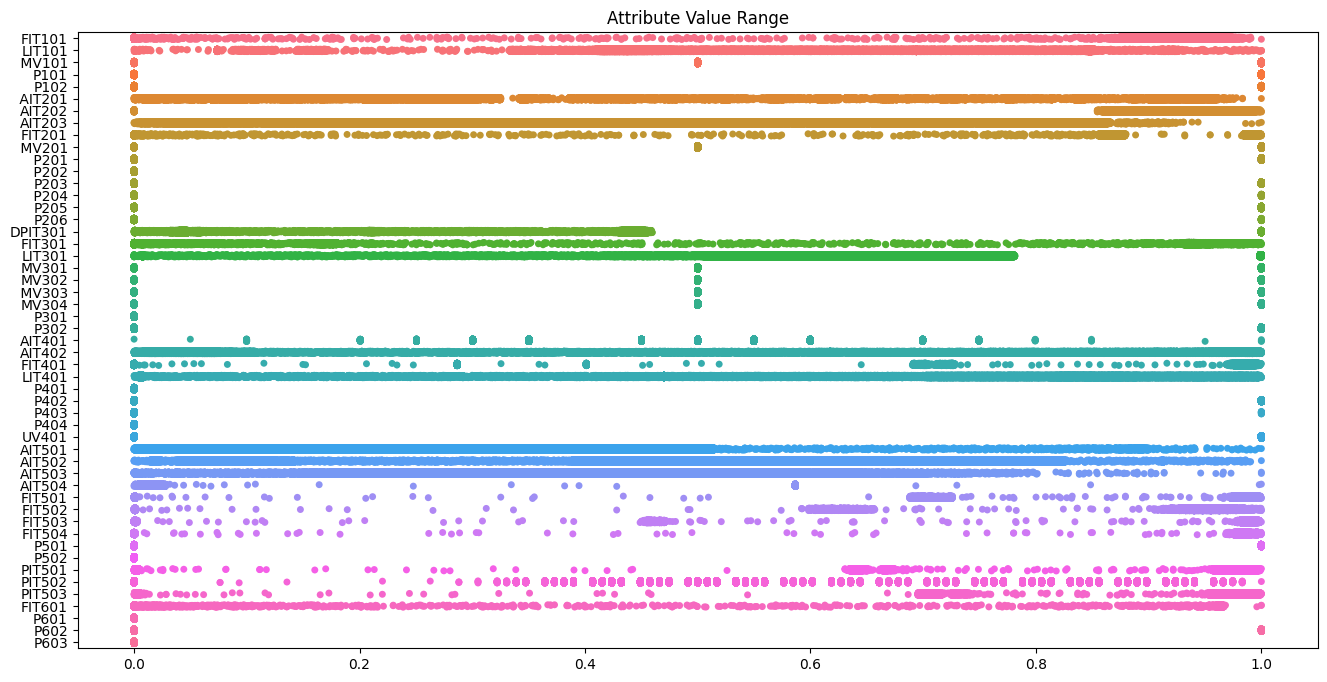

In [23]:
plt.figure(figsize=(16, 8))
sns.stripplot(data=X_normalized_df, jitter=True, orient="h")
plt.title("Attribute Value Range")
plt.show()

In [24]:
r, f = X_normalized_df.shape
columns = X_normalized_df.columns

In [25]:
constant_features = X_normalized_df.columns[X_normalized_df.nunique() == 1]
X_normalized_df.drop(columns=constant_features, inplace=True)

X_normalized_df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,0.905770,0.853975,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.942519,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
1,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.946781,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
2,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.946781,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
3,0.933457,0.855043,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.953693,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
4,0.948231,0.855631,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.960796,0.991713,0.988492,1.0,0.982596,0.88983,0.984050,0.000071,0.0


In [26]:
def find_dist(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

dist_arr = np.zeros((f, f))
for i in range(f):
    for j in range(f):
        dist_arr[i][j] = find_dist(X_normalized_df.iloc[i], X_normalized_df.iloc[j])

In [27]:
np.max(dist_arr)

0.11316673632002282

In [28]:
threshold_distance = 0.1

while dist_arr.size > 0 and np.max(dist_arr) > threshold_distance:
    max_dist_feature_index = np.unravel_index(np.argmax(dist_arr, axis=None), dist_arr.shape)

    removed_feature = columns[max_dist_feature_index[1]]
    if removed_feature in X_normalized_df.columns:
        X_normalized_df.drop(columns=removed_feature, inplace=True)
        print(f"Removed feature: {removed_feature}")

    dist_arr = np.delete(dist_arr, max_dist_feature_index[1], axis=0)
    dist_arr = np.delete(dist_arr, max_dist_feature_index[1], axis=1)

if dist_arr.size == 0:
    print("All features have been removed.")
else:
    print("\nDataFrame after removing distant features:\n", X_normalized_df)


Removed feature: UV401
Removed feature: P302
Removed feature: P402
Removed feature: MV304

DataFrame after removing distant features:
           FIT101    LIT101   MV101  P101  P102    AIT201    AIT202    AIT203  \
0       0.905770  0.853975     1.0   0.0   0.0  0.948892  0.901991  0.348480   
1       0.921126  0.854349     1.0   0.0   0.0  0.948892  0.901991  0.348480   
2       0.921126  0.854349     1.0   0.0   0.0  0.948892  0.901991  0.348480   
3       0.933457  0.855043     1.0   0.0   0.0  0.948892  0.901991  0.348480   
4       0.948231  0.855631     1.0   0.0   0.0  0.948892  0.901991  0.348480   
...          ...       ...     ...   ...   ...       ...       ...       ...   
109237  0.939739  0.436785     1.0   1.0   0.0  0.061717  0.949354  0.188782   
109238  0.929037  0.444473     1.0   1.0   0.0  0.564770  0.910314  0.428460   
109239  0.879828  0.456806     1.0   1.0   0.0  0.904211  0.869868  0.464295   
109240  0.000000  0.775011     0.5   1.0   0.0  0.062360  0.96623

In [29]:
X_normalized_df.columns

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', 'P203', ' P204', 'P205', 'P206',
       'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'AIT401',
       'AIT402', 'FIT401', 'LIT401', 'P403', 'AIT501', 'AIT502', 'AIT503',
       'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P602'],
      dtype='object')

In [30]:
def plot_training_vs_validation(history, model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy Plot
    ax[0].plot(history.history['accuracy'], 'b-', label="Training Accuracy")
    ax[0].plot(history.history['val_accuracy'], 'r-', label="Validation Accuracy")
    ax[0].set_title('Training vs Validation Accuracy - ' + model)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].grid(True)
    ax[0].legend()

    # Loss Plot
    ax[1].plot(history.history['loss'], 'g-', label="Training Loss")
    ax[1].plot(history.history['val_loss'], 'c-', label="Validation Loss")
    ax[1].set_title('Training vs Validation Loss - ' + model)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_normalized_df, Y_encoded, test_size=0.2, random_state=42)

# Reshape the data for CNN
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=10, activation='softmax'))

adam_optimizer = Adam(learning_rate=1e-4)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_cnn.h5', monitor='val_loss', save_best_only=True)
]

cnn_history = cnn_model.fit(
    X_train_reshaped, Y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val_reshaped, Y_val),
    callbacks=callbacks
)


Epoch 1/50
342/342 [==============================] - 18s 44ms/step - loss: 0.7348 - accuracy: 0.7431 - val_loss: 0.3882 - val_accuracy: 0.8120
Epoch 2/50
  3/342 [..............................] - ETA: 12s - loss: 0.4127 - accuracy: 0.8112

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


342/342 [==============================] - 15s 43ms/step - loss: 0.3779 - accuracy: 0.8314 - val_loss: 0.3315 - val_accuracy: 0.8530
Epoch 3/50
342/342 [==============================] - 15s 43ms/step - loss: 0.3229 - accuracy: 0.8672 - val_loss: 0.2971 - val_accuracy: 0.8802
Epoch 4/50
342/342 [==============================] - 15s 44ms/step - loss: 0.2938 - accuracy: 0.8801 - val_loss: 0.2767 - val_accuracy: 0.8782
Epoch 5/50
342/342 [==============================] - 14s 42ms/step - loss: 0.2751 - accuracy: 0.8876 - val_loss: 0.2646 - val_accuracy: 0.9006
Epoch 6/50
342/342 [==============================] - 15s 45ms/step - loss: 0.2621 - accuracy: 0.8938 - val_loss: 0.2530 - val_accuracy: 0.8907
Epoch 7/50
342/342 [==============================] - 16s 45ms/step - loss: 0.2516 - accuracy: 0.8994 - val_loss: 0.2396 - val_accuracy: 0.9040
Epoch 8/50
342/342 [==============================] - 15s 42ms/step - loss: 0.2431 - accuracy: 0.9035 - val_loss: 0.2351 - val_accuracy: 0.9066
Epo

In [33]:
from sklearn.metrics import classification_report

# Assuming cnn_model is your trained model
y_val_pred_probs = cnn_model.predict(X_val_reshaped)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Display classification report
classification_rep = classification_report(Y_val, y_val_pred)
print("Classification Report (Validation Set):\n", classification_rep)


683/683 [==============================] - 3s 4ms/step
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     11069
           1       0.94      0.98      0.96     10780

    accuracy                           0.96     21849
   macro avg       0.96      0.96      0.96     21849
weighted avg       0.96      0.96      0.96     21849



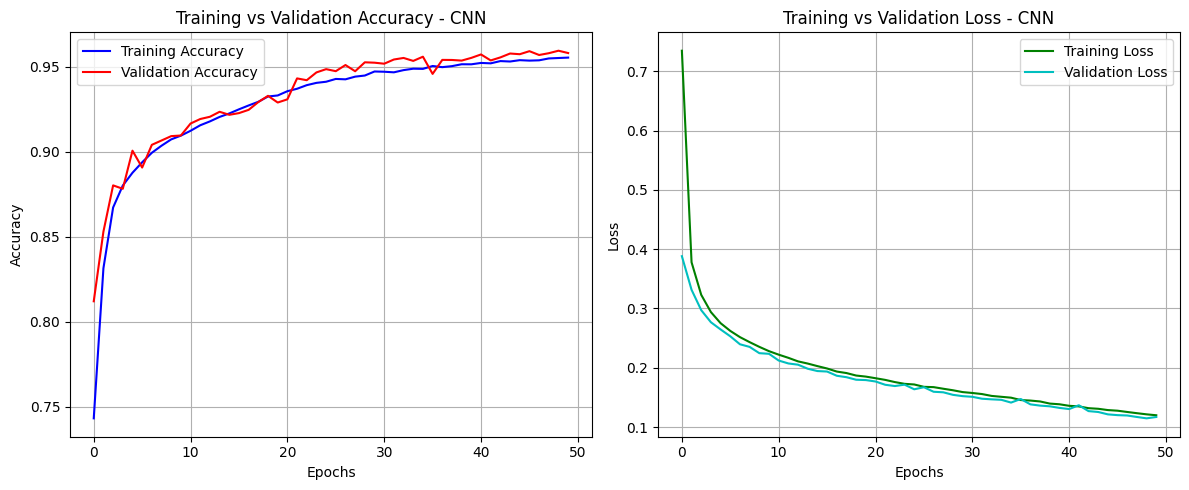

In [34]:
plot_training_vs_validation(cnn_history,"CNN")